<a href="https://colab.research.google.com/github/hnasr1/Side-Projects/blob/master/Time%20Series%20Analysis%20with%20PCA-Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis with PCA (Study of Covid19)

In this project we are working on an up-to-date COVID19 dataset. The dataset reports the number of total cases for different countries at the end of each day.

Data url: https://raw.githubusercontent.com/aps1070-2019/datasets/master/APS-COVID-Jun.csv


In [ ]:
import pandas as pd
import numpy as np

rawdf = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/APS-COVID-Jun.csv',
    index_col=0,
    thousands=','
)

In [ ]:
rawdf

22-Jan  23-Jan  24-Jan  ...  16-Jun  17-Jun  18-Jun
Countries                                   ...                        
Afghanistan              0       0       0  ...   26310   26874   27532
Albania                  0       0       0  ...    1672    1722    1788
Algeria                  0       0       0  ...   11147   11268   11385
Andorra                  0       0       0  ...     854     854     855
Angola                   0       0       0  ...     148     155     166
...                    ...     ...     ...  ...     ...     ...     ...
West Bank and Gaza       0       0       0  ...     514     555     600
Western Sahara           0       0       0  ...       9       9       9
Yemen                    0       0       0  ...     885     902     909
Zambia                   0       0       0  ...    1405    1412    1416
Zimbabwe                 0       0       0  ...     391     401     463

[188 rows x 149 columns]

# Part 1: Exploratory Data Analysis

## 1.1 Plot time-series of original data

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# We just show the data for 20 countries
ListOfCountries = ['US', 'China', 'Canada','France','Germany','Italy','Spain','Pakistan','Iran','United Kingdom','Japan','Peru','Sweden','Austria','Turkey','Poland','Mexico','Argentina','Pakistan','Russia']
ListOfCountries

['US',
 'China',
 'Canada',
 'France',
 'Germany',
 'Italy',
 'Spain',
 'Pakistan',
 'Iran',
 'United Kingdom',
 'Japan',
 'Peru',
 'Sweden',
 'Austria',
 'Turkey',
 'Poland',
 'Mexico',
 'Argentina',
 'Pakistan',
 'Russia']

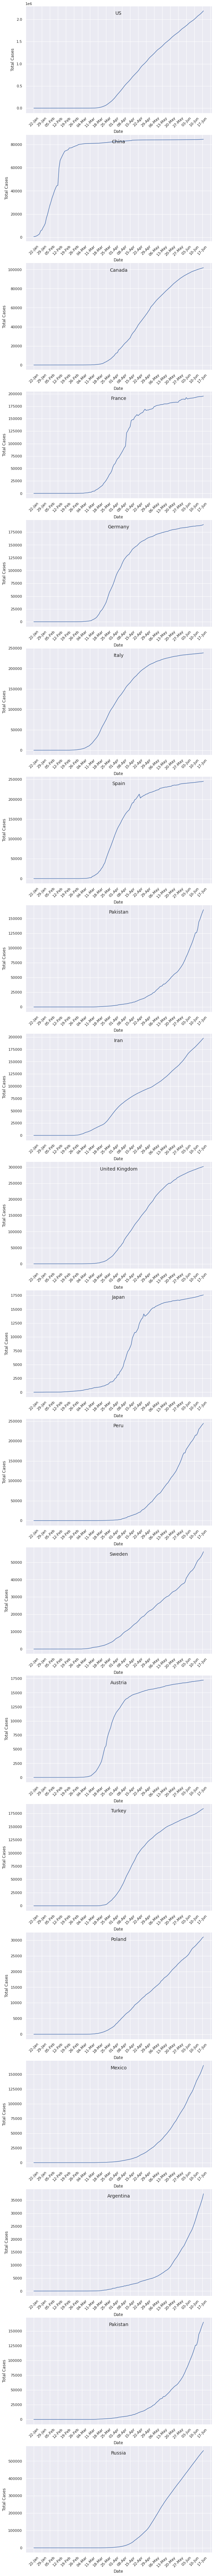

In [ ]:
nplots=np.size(ListOfCountries)
plt.figure(figsize=(10,7*nplots))
gs = gridspec.GridSpec(len(ListOfCountries),1)

for i,country_name in enumerate(ListOfCountries):
    ax = plt.subplot(gs[i])
    plt.plot( rawdf.loc[country_name])
    
    plt.title(country_name,size=14,y=+0.9)
    plt.xlabel('Date')
    plt.xticks(rotation = 45)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
    plt.ylabel('Total Cases')
    # plt.legend(loc='lower right')


## 1.2 Standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardizer

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_columns = standardizer.fit_transform(rawdf)
df_scaled = pd.DataFrame(scaled_columns,columns=rawdf.columns,index=rawdf.index)
df_scaled.tail()

22-Jan    23-Jan    24-Jan  ...    16-Jun    17-Jun    18-Jun
Countries                                         ...                              
West Bank and Gaza -0.074065 -0.074383 -0.074803  ... -0.239018 -0.240081 -0.240340
Western Sahara     -0.074065 -0.074383 -0.074803  ... -0.241827 -0.243070 -0.243528
Yemen              -0.074065 -0.074383 -0.074803  ... -0.236954 -0.238182 -0.238674
Zambia             -0.074065 -0.074383 -0.074803  ... -0.234061 -0.235390 -0.235939
Zimbabwe           -0.074065 -0.074383 -0.074803  ... -0.239702 -0.240924 -0.241079

[5 rows x 149 columns]

## 1.3 Plot the standardized time-series

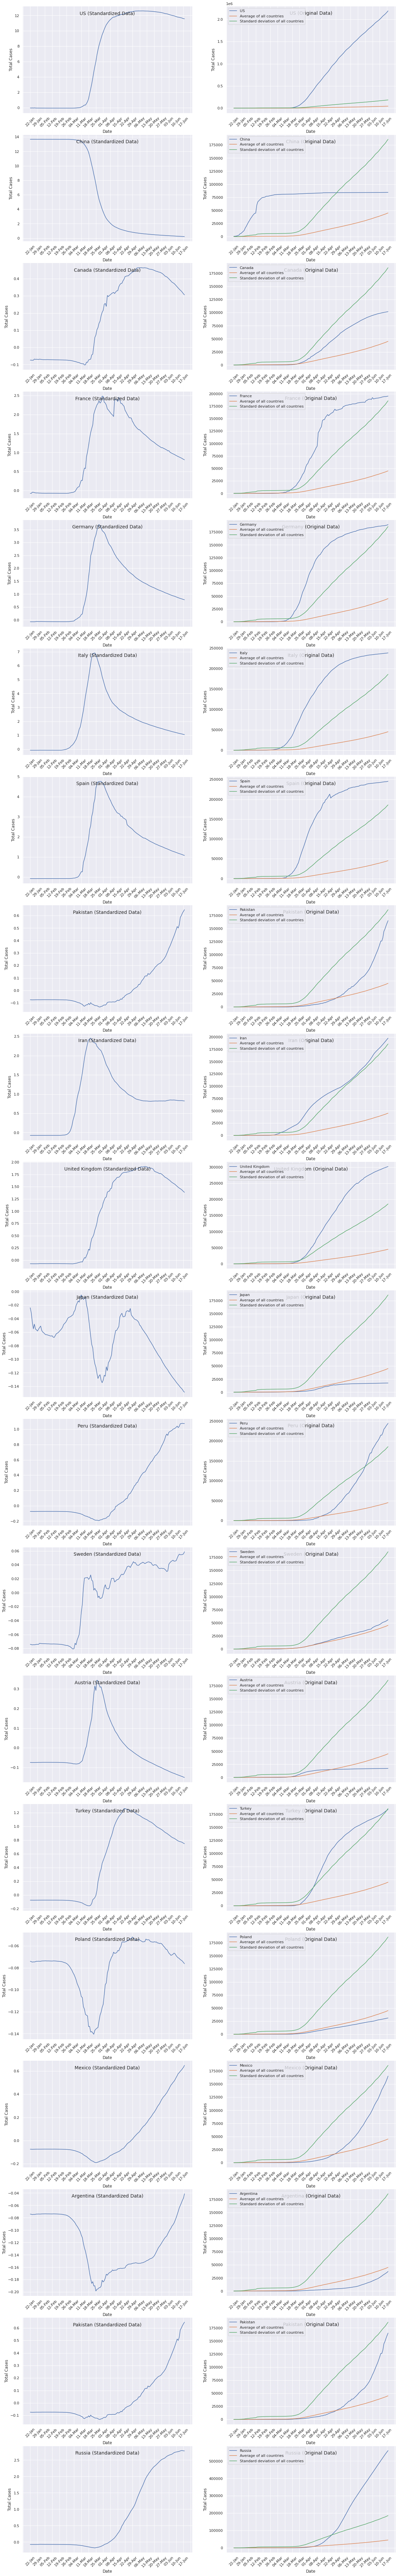

In [ ]:
nplots=np.size(ListOfCountries)
plt.figure(figsize=(20,7*nplots))
gs = gridspec.GridSpec(len(ListOfCountries),2)

for i,country_name in enumerate(ListOfCountries):
    ax = plt.subplot(gs[2*i])
    # ax.patch.set_visible(False)
    plt.plot( df_scaled.loc[country_name])
    plt.title(country_name + ' (Standardized Data)',size=14,y=+0.9)
    plt.xlabel('Date')
    plt.xticks(rotation = 45)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
    plt.ylabel('Total Cases')
    # plt.legend(loc='lower right')

    ax1 = plt.subplot(gs[2*i+1])
    plt.plot( rawdf.loc[country_name], label = country_name)
    plt.plot(rawdf.mean(),label = 'Average of all countries')
    plt.plot(rawdf.std(),label = 'Standard deviation of all countries')

    plt.title(country_name + ' (Original Data)',size=14,y=+0.9)
    plt.xlabel('Date')
    plt.xticks(rotation = 45)
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(7))
    plt.ylabel('Total Cases')
    plt.legend()

## 1.4 Explain the trend of standardized data
The standardized data are basically the original data minus the average of all countries and divided by the standard deviation of all countries for each particualr day. First of all, **positive** values of standardized data mean that the total cases of that country is above the average for that particualr day. **Negative** values, on the other hand, mean that total cases are less the average of all cuntries. 

An **Ascending trend** in the standardized data mean that the country is either getting close to the average or the variance of data is increasing or both. As shown in the above figures, the mean and standard deviation of all countries (shown by orang and green lines, respectively) are increasing. Therefore, when we an ascending trend in standardized data, it means that the country is dramatically moving away from the average. In other words, that country is handling the pandemic much worse than the average of countries.

A **Descending trend** may be attributed to the increase in varaince or approachging the country to the average and less than that. 
<br> As we move forward in time, the probability distribution of the total case for a day becomes more wide, as variance is increasing. Therefore, a descending trend in standardized data also mean that the the P-value of the hypothesis test that the country is close to average increases.

Now we look at US, Canada, and China:

**US**: The total cases start to surge significantly from the 2nd week of March and as we can see, the standardized data has an ascending trend. This means that even though the variance is increasing, US cases is faster deviating from the average. This increasing trend starts to lose its momentum from the 1st week of April and one month later (in May), it starts to decrease. This decreasging trend after May means that either US is doing better than the average, or the increase in variance of data outweigh the increase in difference to the average. 

**Canada**: Canada has alsmost a similar trend as US, yet with a less steep increase in standaridized data. Simialrly, the upsurge of cases in Canada led to significnat deviation from the average of all countries which, despite increasing trend in variance, led to increase in standarided data. After the first week of May, the speed of increasing in numbrer of cases appears to decelerate, leading a descmding trend.

**China**: The case of China is interesintg. The trend is all negative, which means that difference between all countries and Chine is decreasing. In fact, after around mid February, the number of cases in China is almost fixed, with relatively samll number of new cases everyday. However, the average number of cases in other countries is increasing and so is the variance. Therefore, we see a sharp descending trend in China. After a certain period, this trend loses its momentum, yet still decreasing. 



## 1.5 Patterns in other countries
Different trend are obseved in other countries as listed below:
<br> '**France**', Increasing then decreasing, an oscillation is also observed in the middle of its way.
<br> '**Germany**', Increasing then decreasing
<br> '**Italy**', Increasing then decreasing
<br>'**Spain**', Increasing then decreasing
<br>'**Pakistan**', mildly decreasing first and then significantly increasing
<br>'**Iran**', Increasing then decreasing
<br>'**United Kingdom**', Increasing then decreasing
<br>'**Japan**', Oscillatory trend (decrease, increase, decrease, increase, decrease)
<br>'**Peru**', mildly decreasing first and then significantly increasing
<br>'**Sweden**', Oscillatory trend
<br>'**Austria**', Increasing then decreasing,
<br>'**Turkey**', Increasing then decreasing,
<br>'**Poland**', Oscillatory trend (decrease, increase, decrease)
<br>'**Mexico**', mildly decreasing first and then significantly increasing
<br>'**Argentina**', decreasing then increasing (always below average)
<br>'**Pakistan**', mildly decreasing first and then significantly increasing
<br>'**Russia**', mildly decreasing first and then significantly increasing



# Part 2: Applying PCA


## 2.1 Covariance Matrix

In [ ]:
# Compute covariance matrix
C = np.cov(df_scaled.T)
print('The shape of the covariance matrix is ' , C.shape, '\n')

The shape of the covariance matrix is  (149, 149) 



## 2.2  Eigen Decomposition

In [ ]:
n, m = df_scaled.shape

# Eigen decomposition
eigenValues, eigenVectors = np.linalg.eig(C) 
print ("Eig Vec:\n ",eigenVectors, " \n Eig Val: \n", eigenValues)

Eig Vec:
  [[ 4.28373818e-02 -1.20386872e-01 -5.00902052e-02 ...  1.10276675e-02
   2.29390477e-03  1.34249069e-03]
 [ 4.28069728e-02 -1.20401471e-01 -5.00907610e-02 ... -1.10721069e-02
   8.00520319e-03 -5.35864454e-03]
 [ 4.28875947e-02 -1.20362448e-01 -4.99601261e-02 ...  1.27813368e-03
  -8.30139283e-03  8.89730651e-03]
 ...
 [ 9.33726890e-02  5.05684017e-02 -1.21751088e-01 ... -1.17237615e-04
   3.77268576e-05  2.05103200e-04]
 [ 9.30066272e-02  5.05129079e-02 -1.23971015e-01 ... -5.22289780e-05
   1.51386479e-04  5.59541637e-05]
 [ 9.27978826e-02  5.05113294e-02 -1.25360786e-01 ... -4.08680819e-06
  -1.43200970e-04 -1.37317184e-06]]  
 Eig Val: 
 [ 8.58455213e+01  5.74321578e+01  5.14896985e+00  1.12632121e+00
  1.61985818e-01  4.93295188e-02  1.73951271e-02  5.74501347e-03
  4.62349290e-03  1.39734559e-03  8.36331764e-04  5.62392206e-04
  4.68090942e-04  4.03427604e-04  2.50979802e-04  1.62988523e-04
  1.18577340e-04  8.49341939e-05  6.77534342e-05  6.26171966e-05
  5.10492780e-

## 2.3 Variance explanation (Scree plot)

In [ ]:
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

In [ ]:
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)
cumExpVar

array([ 57.30798402,  95.64802942,  99.08533258,  99.83723201,
        99.94536905,  99.97830001,  99.98991249,  99.99374769,
        99.9968342 ,  99.99776703,  99.99832534,  99.99870078,
        99.99901326,  99.99928258,  99.99945013,  99.99955893,
        99.99963809,  99.99969479,  99.99974002,  99.99978182,
        99.9998159 ,  99.9998466 ,  99.99987104,  99.99989143,
        99.99990764,  99.99992313,  99.99993384,  99.99994206,
        99.99994888,  99.99995556,  99.99996013,  99.99996462,
        99.99996827,  99.9999717 ,  99.99997492,  99.99997775,
        99.99998042,  99.99998269,  99.9999846 ,  99.99998632,
        99.99998786,  99.99998922,  99.99999037,  99.99999135,
        99.99999222,  99.999993  ,  99.99999369,  99.99999433,
        99.99999488,  99.99999541,  99.99999586,  99.99999626,
        99.99999658,  99.9999969 ,  99.99999717,  99.99999744,
        99.99999767,  99.99999789,  99.99999809,  99.99999827,
        99.99999844,  99.99999859,  99.99999872,  99.99

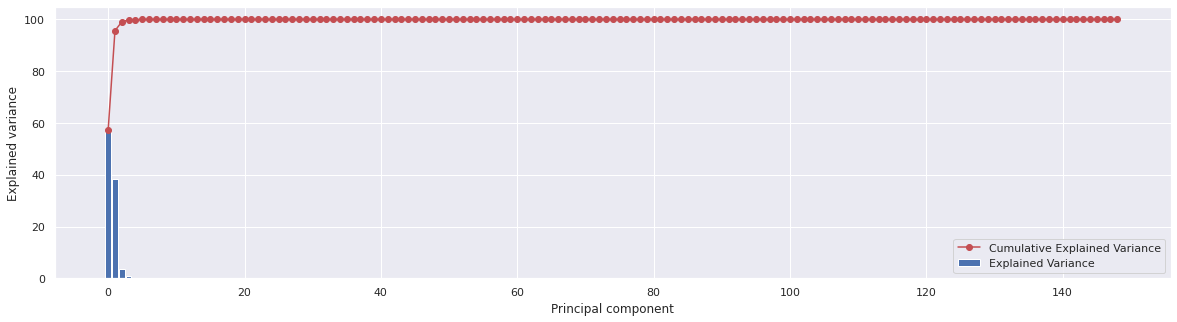

In [ ]:
plt.figure(figsize=(20,5))
plt.bar(range(149), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
# plt.axhline(99, linestyle='--', color='.5', label = '99% of variance')
plt.xlabel('Principal component')
plt.ylabel('Explained variance')

plt.legend()
plt.show()

### 2.3.1 Find the number of Principal components that explain 99% of variance in data

In [ ]:
numVar = 0
tempExpVar = cumExpVar[numVar]

while tempExpVar < 99:
  numVar = numVar + 1
  tempExpVar = cumExpVar[numVar]

print ('The number of Principal components to explain 99% of variance in data is ', numVar + 1)

The number of Principal components to explain 99% of variance in data is  3


## 2.4 Time series data for first 10 principal components


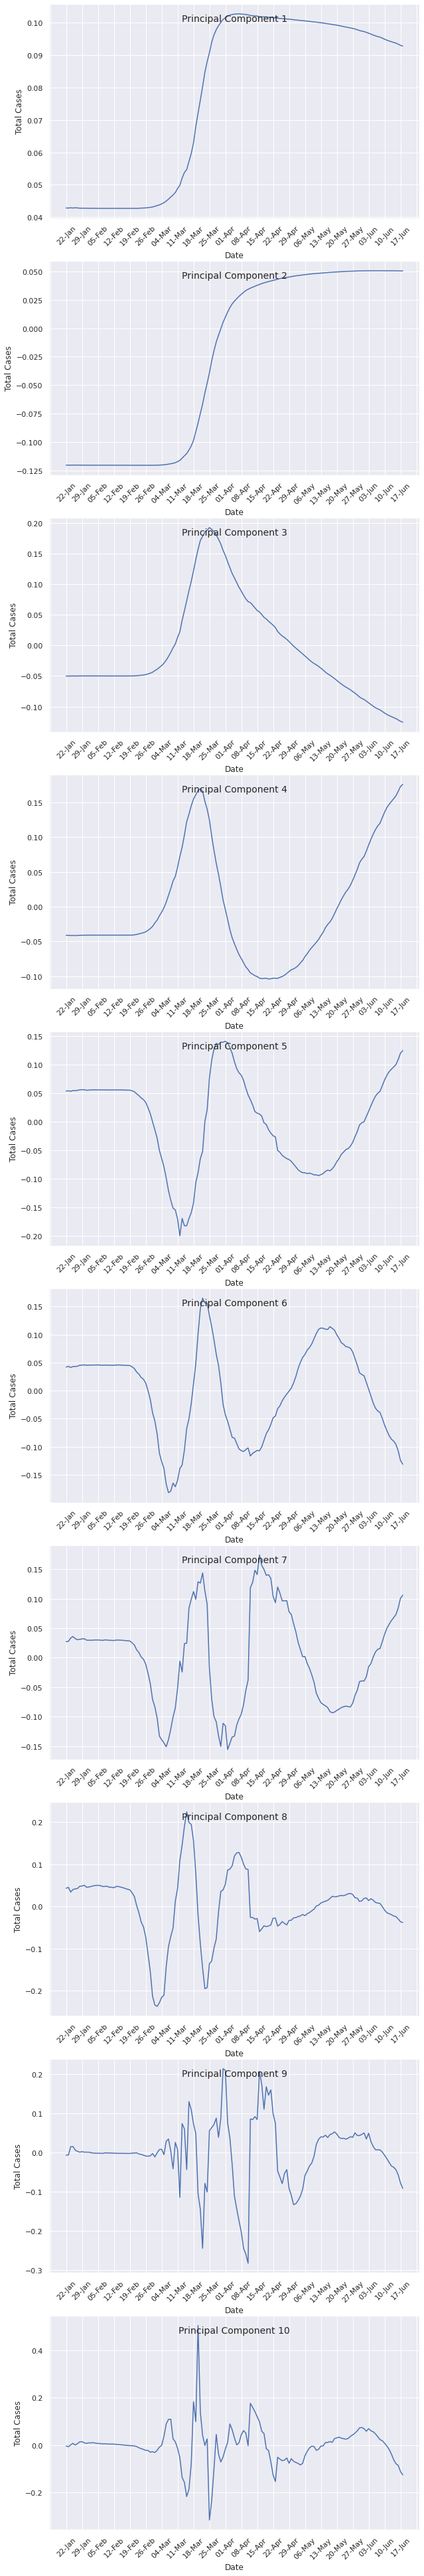

In [ ]:
nplots= 10
plt.figure(figsize=(10,7 * nplots))
gs = gridspec.GridSpec(10,1)

for i in np.arange(10):
    ax2 = plt.subplot(gs[i])
    plt.plot(rawdf.columns,eigenVectors[:,i])
    
    plt.title('Principal Component '+ str(i+1) ,size=14,y=+0.9)
    plt.xlabel('Date')
    plt.xticks(rotation = 45)
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(7))
    plt.ylabel('Total Cases')
    # plt.legend(loc='lower right')

## 2.5 Explaination of Principal Components

I think what principal component are representing here is the trends in the standardized data. For instance, the first principal component is the most common trend withing all countries, i.e., increaseing then mildly decreasring. The 2nd common trend, represented in PC2, is an ever increaing trend and so forth. For the first 8 principal components, the trends are rational. However, Princiapl component 9 and after are mostly capturing the noise in the data.

To reconstruct each data, one needs to combine these trends, as shown in next part.

# Part 3: Data reconstruction

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def reconstruct(country_name, plotVar = True):
  nplots = 22 
  plt.figure(figsize=(18,5*nplots))
  gs = gridspec.GridSpec(21,2)

  #plot the standardized time series
  if plotVar: 
    ax1 = plt.subplot(gs[0])
    plt.plot( df_scaled.loc[country_name]) 
    plt.title(country_name,size=14,y=+0.9)
    plt.xlabel('Date')
    plt.xticks(rotation = 45)
    
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(7))
    plt.ylabel('Total Cases')

  RMSE = []
  for PC_count in np.arange(30):
    W = eigenVectors[:, 0:PC_count+1]
    projX = np.dot(df_scaled, W)

    # print(df_scaled.shape,'    ', W.shape , '    ', projX.shape)

    # Reconstruction
    ReconX = np.dot(projX, W.T)
    recon_df = pd.DataFrame(ReconX,columns=df_scaled.columns,index=df_scaled.index)
    

    #plot the standardized time series and reconstructed data
    if (plotVar and (PC_count < 10)):
      tempAx = plt.subplot(gs[2*PC_count+2])
      plt.plot(df_scaled.loc[country_name], label = 'Standardized data') 
      plt.plot(recon_df.loc[country_name], label = 'Reconstructed data (' + str(PC_count+1) + ' PC)') 

      plt.title(country_name,size=14,y=+0.9)
      # plt.xlabel('Date')
      plt.xticks(rotation = 45)

      tempAx.xaxis.set_major_locator(ticker.MultipleLocator(7))
      # plt.ylabel('Total Cases')
      plt.legend()

    #plot the residuals
    rmse = np.sqrt(mean_squared_error(df_scaled.loc[country_name],recon_df.loc[country_name]))
    RMSE.append(rmse)
    diff =recon_df.loc[country_name] - df_scaled.loc[country_name]

    if (plotVar and (PC_count < 10)):
      tempAx2 = plt.subplot(gs[2*PC_count+3])
      plt.plot(df_scaled.columns, diff, label = 'Residual (' + str(PC_count+1) + ' PC)') 

      plt.title(country_name + ' (RMSE = %f)' %rmse,size=14,y=+0.9)
      # plt.xlabel('Date')
      plt.xticks(rotation = 45)

      tempAx2.xaxis.set_major_locator(ticker.MultipleLocator(7))
      plt.ylabel('Error')
      plt.legend()

  # Find the number of PCs
  numVar = 0
  rmse1 = RMSE[0]

  try:
    while RMSE[numVar]/rmse1 > 0.01:
      numVar = numVar + 1
      
    print (numVar + 1, 'PCs are needed so that RMSE would be less than 1% of data reconstruction with only the first principal component')
    return(numVar + 1)

  except:
    print("More than 30 PCs are needed so that RMSE would be less than 1% of data reconstruction with only the first principal component")
    return(30)


5 PCs are needed so that RMSE would be less than 1% of data reconstruction with only the first principal component


5

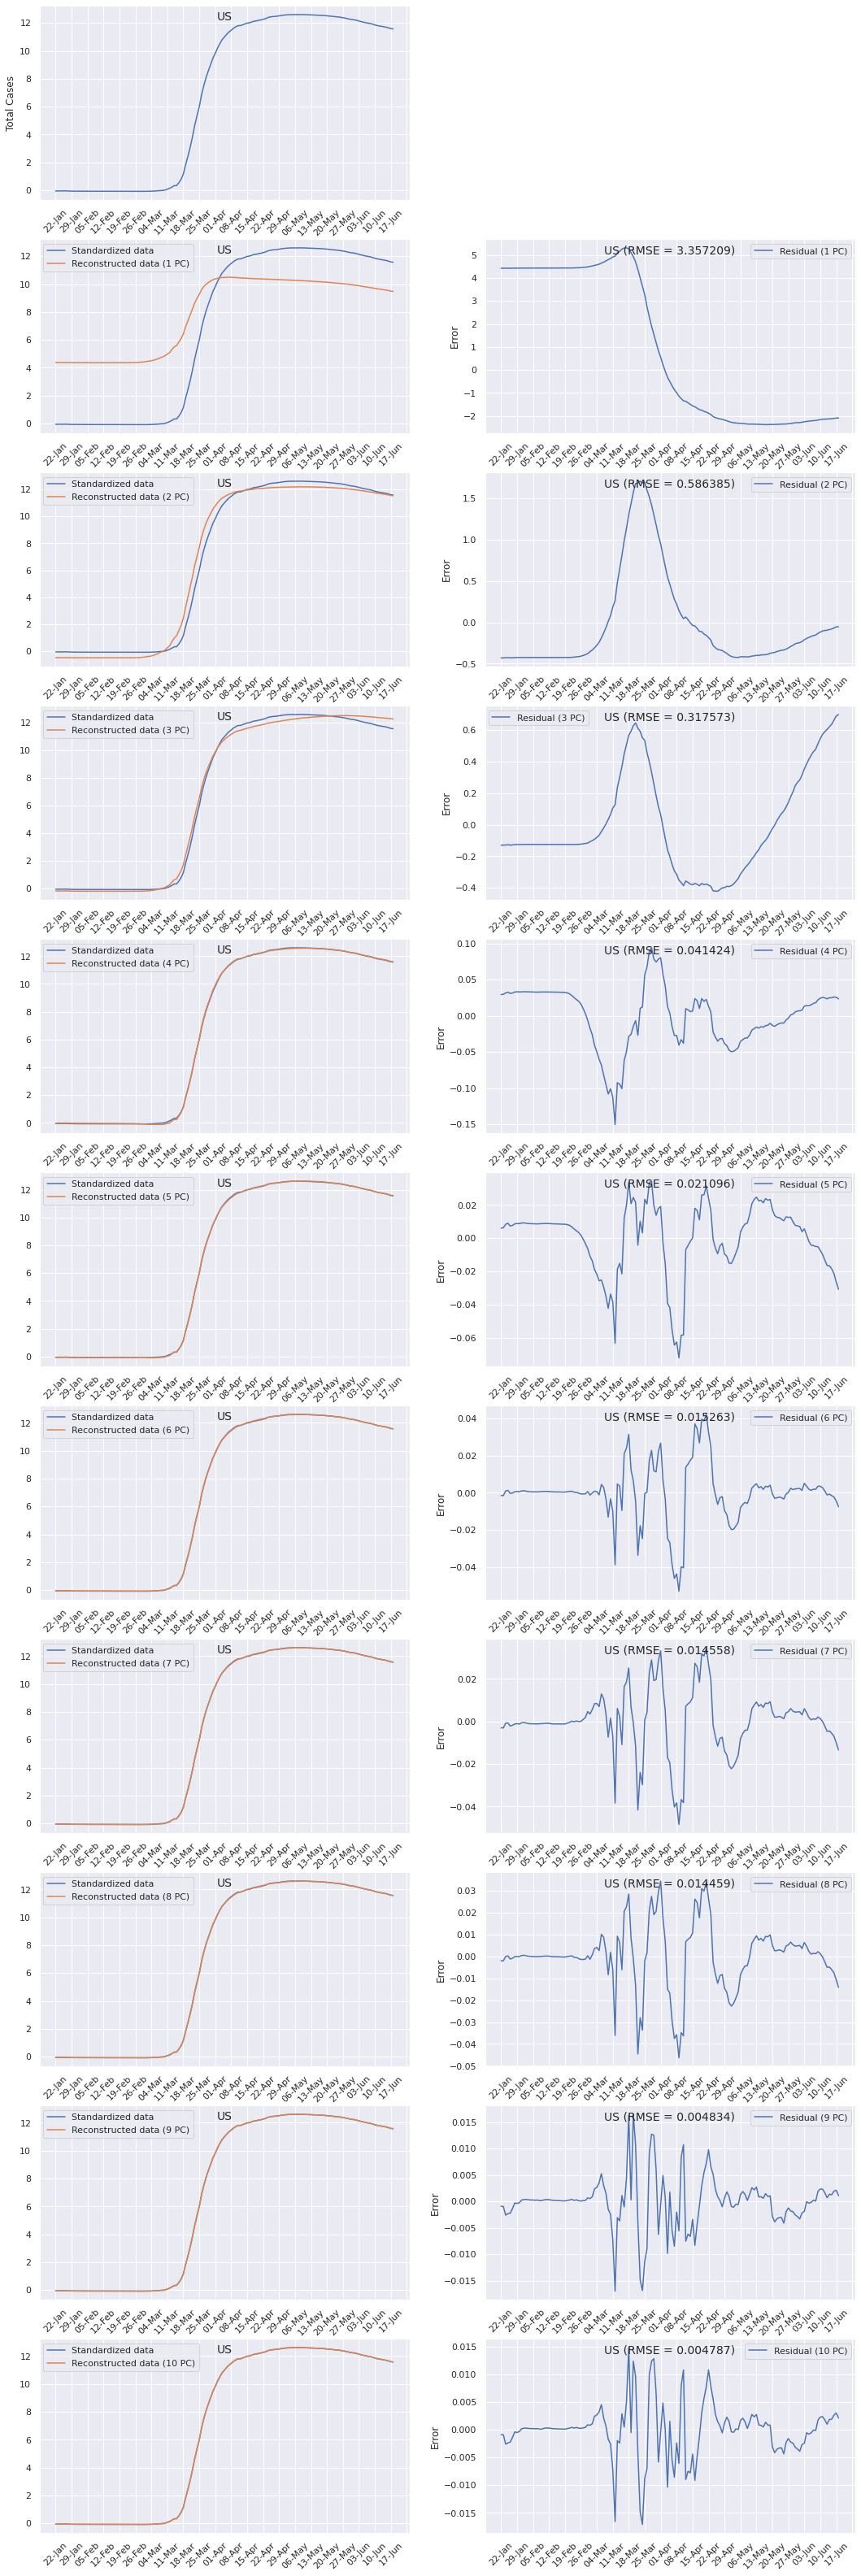

In [ ]:
reconstruct('US')

3 PCs are needed so that RMSE would be less than 1% of data reconstruction with only the first principal component


3

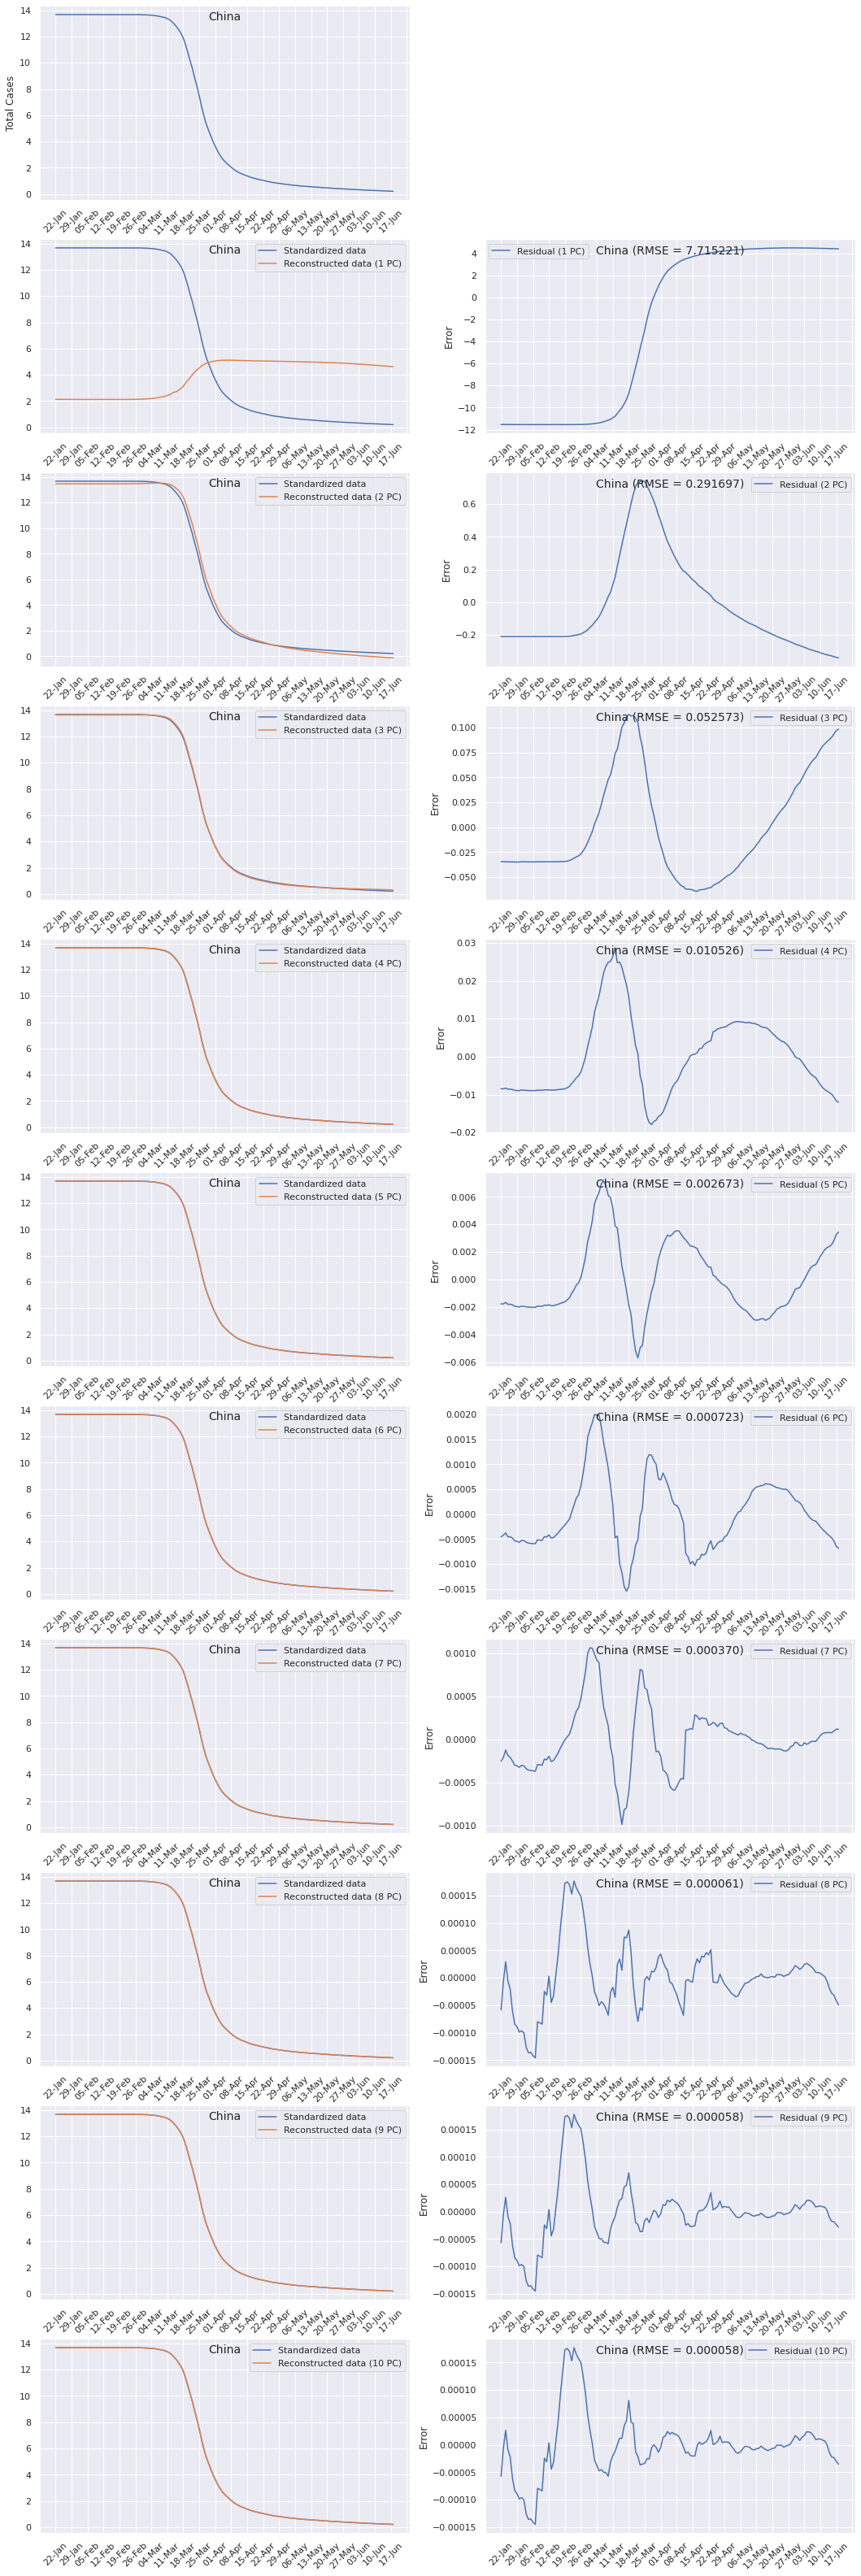

In [ ]:
reconstruct('China')

27 PCs are needed so that RMSE would be less than 1% of data reconstruction with only the first principal component


27

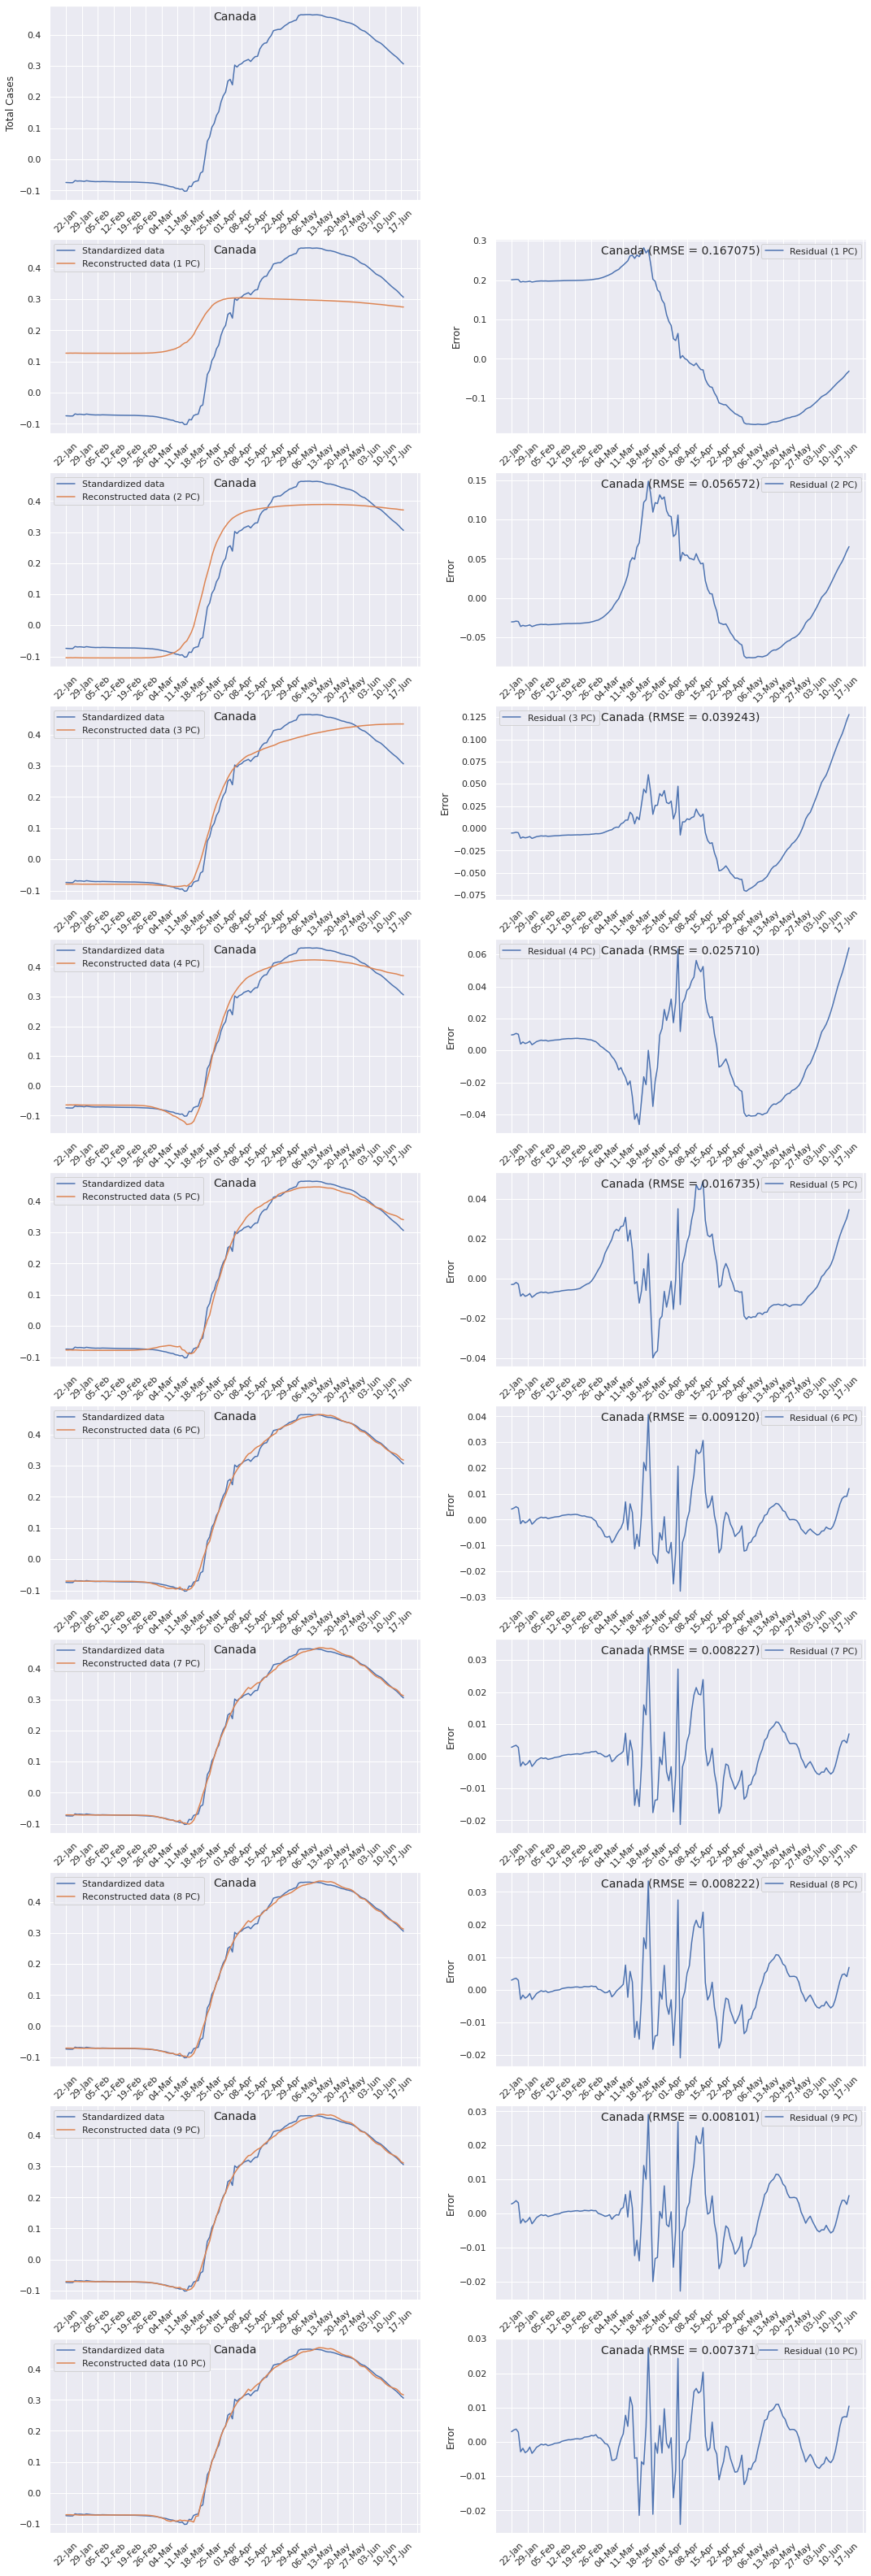

In [ ]:
reconstruct('Canada')

# Part 4: Time series data predictio with PCA



Each of our principal component has 149 items.
To Predict the next 7 days we need to extend our principal component for one week. That is, we need to add 7 elements to the end of each of the PC. To this end, I employed linear regression model, fit on the last 14 elements of the PC, to predict the next 7 new elements of that PC. The choice of linear regression was becasue the PCs tend to follow a linear pattern in the last days. After this process, each PC will have 156 elements.

Next, the "ProjX" matrix obtained from the last part was used to reconstruct, say, predict the data. Suppose, we have selected 4 PCs for reconstruction/precition. Therefore, we have ProjX (188 * pc_count), which is multiplied to the transpose of our extended eigenVector of PCs (pc_count* 149). This results in a reconstruced matrix of 188*156.

Finally, I used the function developed at previous part to obtain the appropriate number of  PCs for each country, e.g., 27 PCs are needed for Canada. Finally, I plotted the reconstructed/predicted data against observed data for different cases of number of PCs.
As seen, PCA has been quite successful to predict the future.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# recevies a PCA and predicts the next 7 days PCA element
def pred_PCA (pca):
  tempPCA = pca
  pca_2weeks = pca[-14:]

  X = np.arange(135,149)
  y = pca_2weeks

  
  X_test = np.arange(149,156)

  reg = LinearRegression()
  reg.fit(X.reshape(-1,1), y)

  pca_nextWeek = reg.predict(X_test.reshape(-1,1))
  # print(tempPCA)

  result = pca.tolist()
  for i in np.arange(7):
    result.append(pca_nextWeek[i])

  return result

In [ ]:
def extended_pca(pc_count):
  result=[]

  for i in np.arange(pc_count):
    eigVec = eigenVectors[:,i]
    eigVecExt = pred_PCA(eigVec)
    result.append(eigVecExt)

  return  np.asarray(result).reshape(pc_count,156).T

In [ ]:
cols=df_scaled.columns.to_list()
cols.append('19-Jun')
cols.append('20-Jun')
cols.append('21-Jun')
cols.append('22-Jun')
cols.append('23-Jun')
cols.append('24-Jun')
cols.append('25-Jun')

def reconPred(pc_count,country_name):
  W_ext = extended_pca(pc_count)
  W = eigenVectors[:, 0:pc_count]
  projX = np.dot(df_scaled, W)

  # # Reconstruction
  predictX = np.dot(projX, W_ext.T)
  predictX.shape

  recon_pred_scaled_df = pd.DataFrame(predictX,columns=cols,index=df_scaled.index)
  meanVec = pred_PCA(rawdf.mean())
  stdVec = pred_PCA(rawdf.std())

  rawPred_data = predictX * stdVec + meanVec
  recon_pred_df = pd.DataFrame(rawPred_data,columns=cols,index=df_scaled.index)

  return recon_pred_df.loc[country_name]

In [ ]:
def plot_pred(country_name,pc_count):
  nplots = 2*pc_count 
  plt.figure(figsize=(18,5*nplots))
  gs = gridspec.GridSpec(nplots,2)

  if country_name == 'Canada':
    futureWeekCases = [100629, 101019, 101337, 101637, 101963, 102242, 102622]
  elif country_name == 'Brazil':
    futureWeekCases = [1038568, 1070139, 1086990, 1111348, 1151479, 1192474, 1233147]
  elif country_name == 'Russia':
    futureWeekCases = [569063, 576952, 584680, 592280, 599705, 606881, 613994]

  for i in np.arange(pc_count):
    rmse = np.sqrt(mean_squared_error(rawdf.loc[country_name],reconPred(i+1,country_name)[:149]))
    data = rawdf.loc[country_name].values.tolist()

    tempAx = plt.subplot(gs[2*i])
    numData = 149
    if country_name in ['Canada','Brazil','Russia']:
      numData = 156
      for j in np.arange(7):
        data.append(futureWeekCases[j])

    plt.plot(cols[:numData], data, label = 'Original data')
    plt.plot(cols, reconPred(i+1,country_name), label = 'Reconstructed data (' + str(i+1) + ' PC)')

    plt.title(country_name + ' (RMSE = %f)' %rmse,size=14,y=+0.9)
    # plt.xlabel('Date')
    plt.xticks(rotation = 45)

    tempAx.xaxis.set_major_locator(ticker.MultipleLocator(7))
    plt.ylabel('Total Cases')
    plt.legend(loc = 'lower right')




    if country_name in ['Canada','Brazil','Russia']:
      tempAx2 = plt.subplot(gs[2*i+1])
      plt.plot(cols[-7:], futureWeekCases, label = 'Future observation') 
      plt.plot(cols[-7:], reconPred(i+1,country_name)[-7:], label = 'Predicted data (' + str(i+1) + ' PC)')
      # rmse = np.sqrt(mean_squared_error(rawdf.loc[country_name],reconPred(i+1,country_name)[:149]))

      plt.title(country_name + ' (Future Prediction)',size=14,y=+0.9)
      # plt.xlabel('Date')
      plt.xticks(rotation = 45)
      plt.ylabel('Total Cases')
      plt.legend(loc = 'lower right')


27 PCs are needed so that RMSE would be less than 1% of data reconstruction with only the first principal component


<Figure size 1296x7920 with 0 Axes>

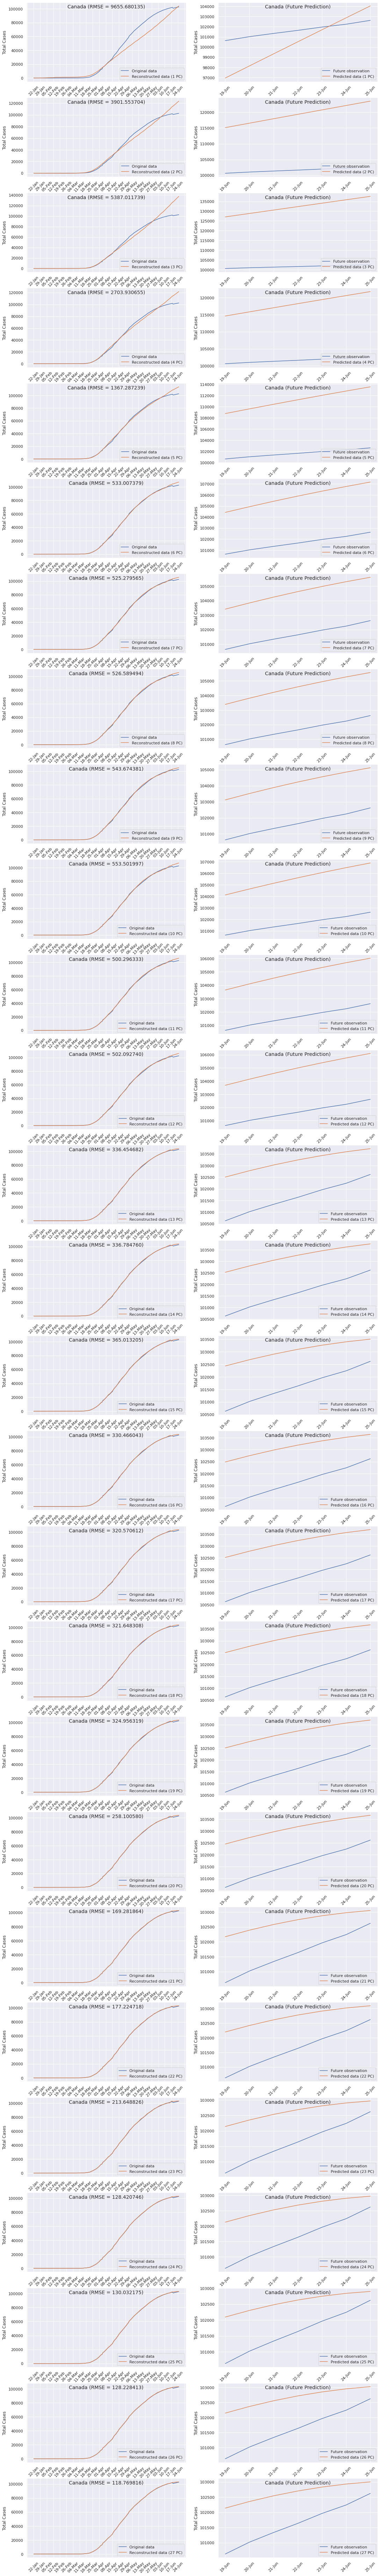

In [ ]:
optNumPC = reconstruct('Canada',False)
plot_pred('Canada',optNumPC)

7 PCs are needed so that RMSE would be less than 1% of data reconstruction with only the first principal component


<Figure size 1296x7920 with 0 Axes>

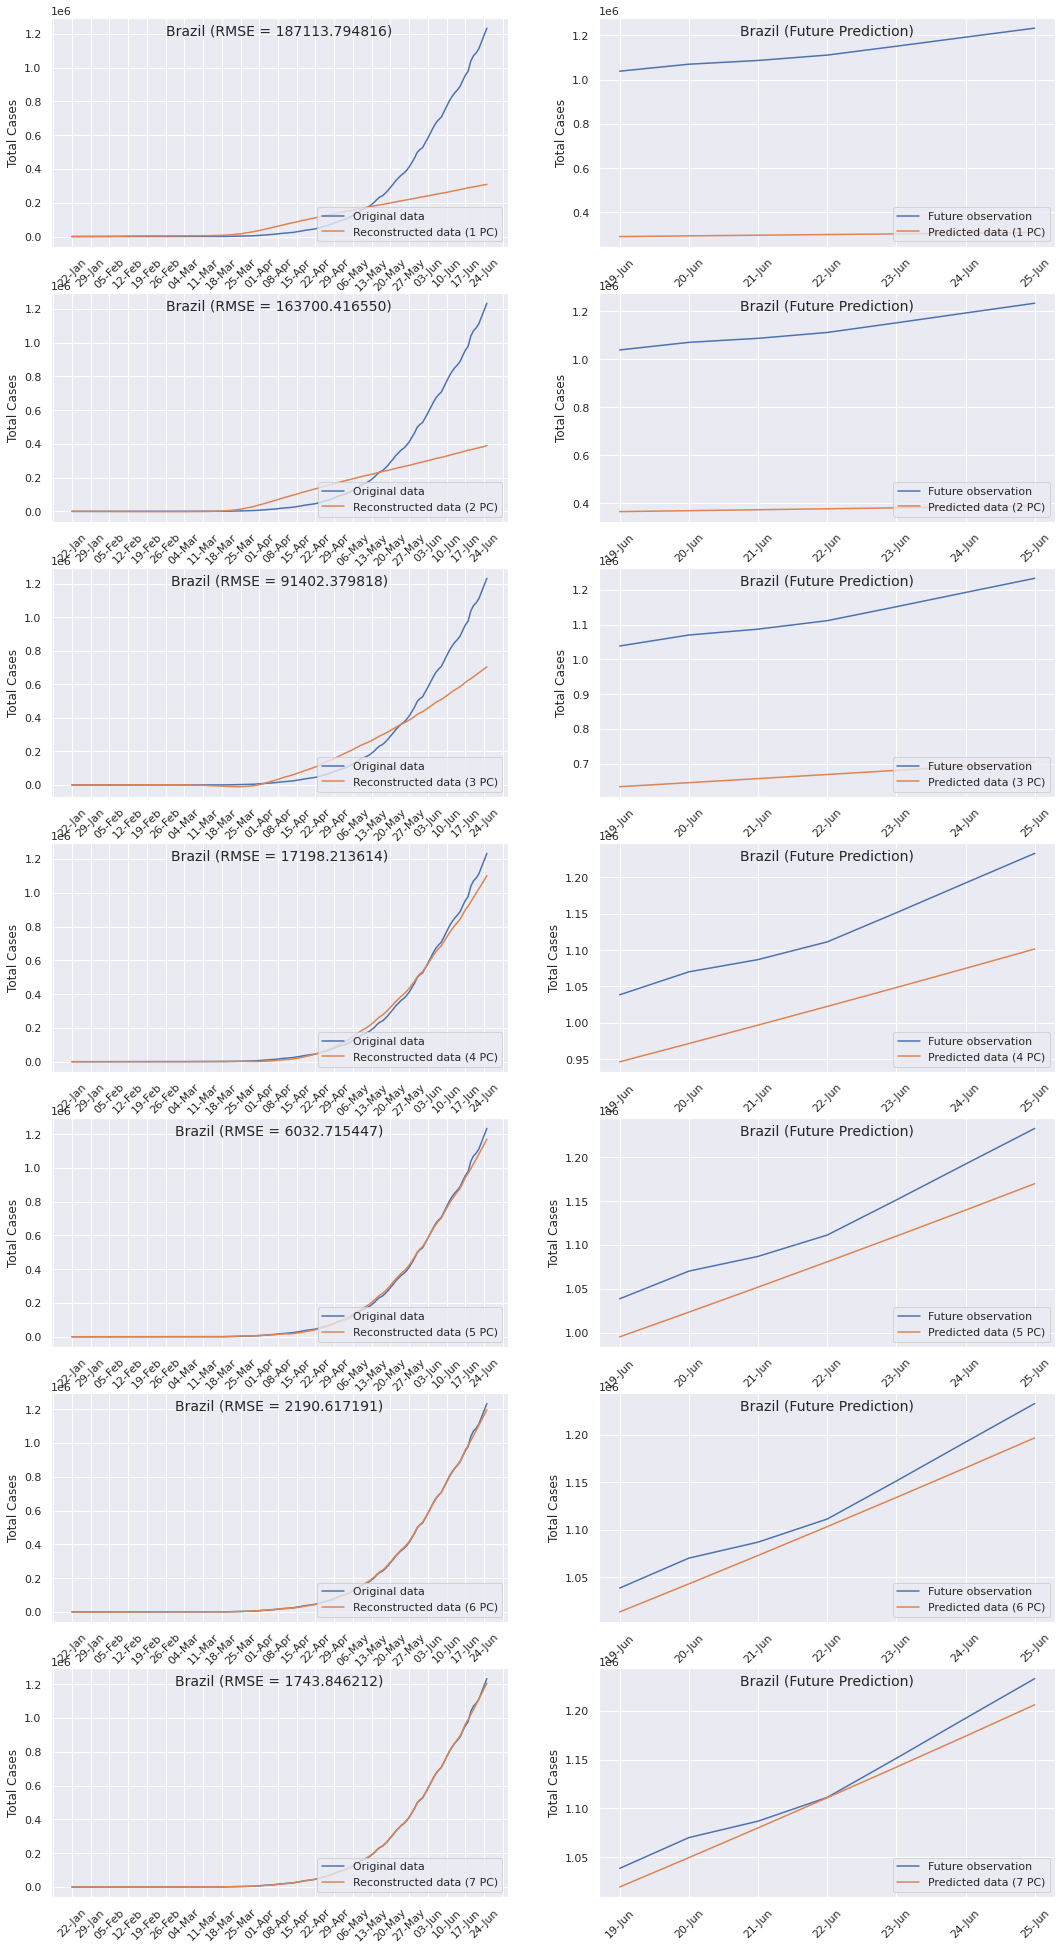

In [ ]:
optNumPC = reconstruct('Brazil',False)
plot_pred('Brazil',optNumPC)

9 PCs are needed so that RMSE would be less than 1% of data reconstruction with only the first principal component


<Figure size 1296x7920 with 0 Axes>

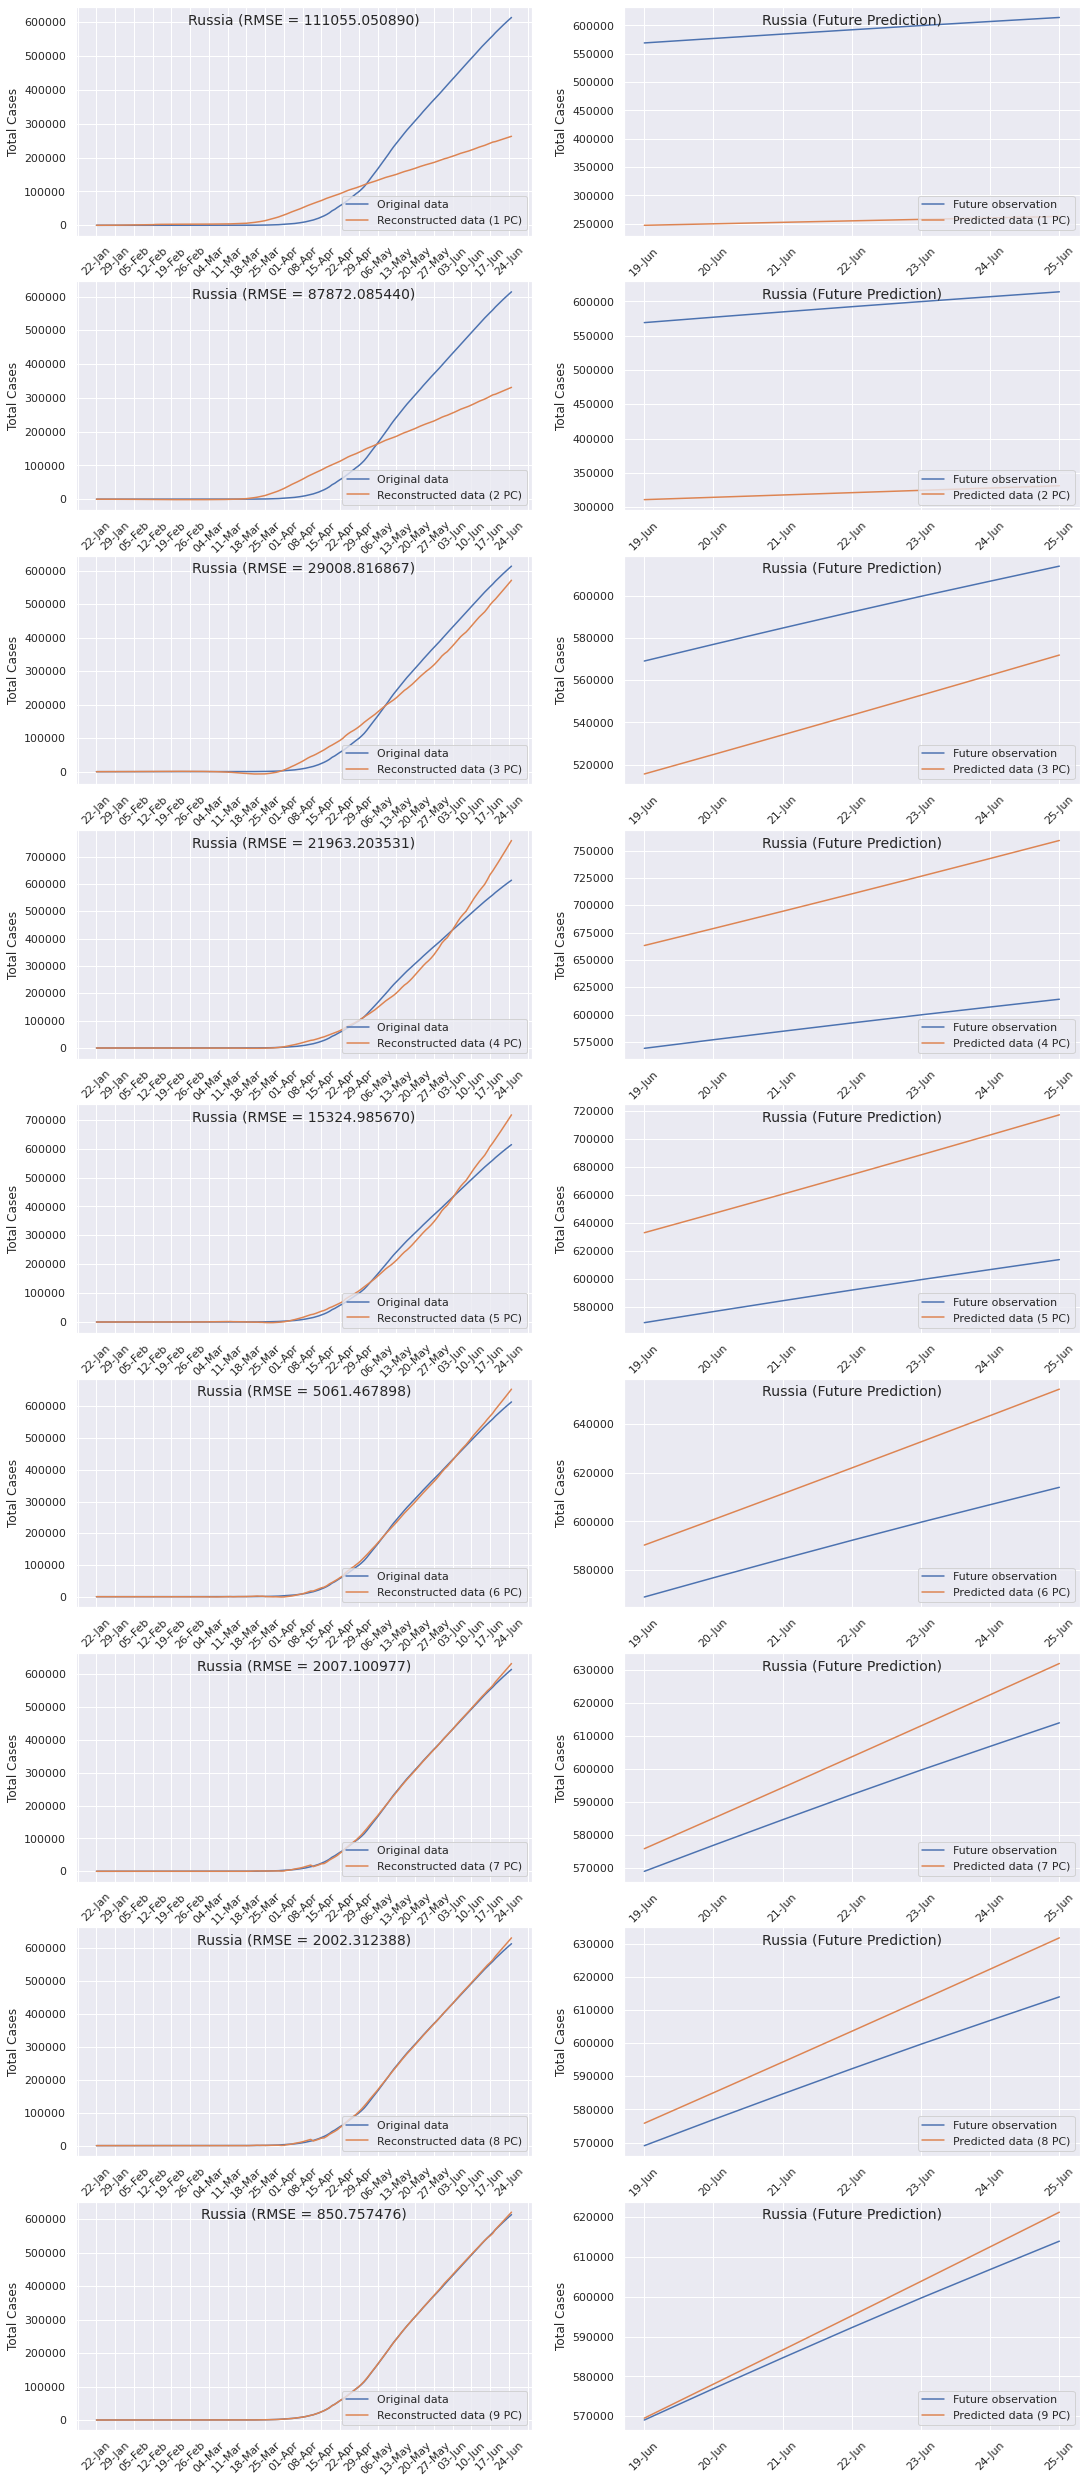

In [ ]:
optNumPC = reconstruct('Russia',False)
plot_pred('Russia',optNumPC)

# References

Understanding PCA and SVD:
1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:
1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/
2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:
1. https://www.worldometers.info/coronavirus/
2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined


